### Искусственные нейронные сети

#### Практическое задание для самостоятельного выполнения

**Задание 11.**

Создать и обучить нейросеть, решающую задачу аппроксимации функции пяти независимых переменных. В качестве аппроксимируемой функции рассмотреть функцию $y = \frac{x_{1}+x_{2}}{x_{3}} + x_{4}\cdot x_{5}$

1. Сформировать набор данных из 1000 объектов: значения признаков – псевдослучайные числа, равномерно распределенные на интервале (1; 3); значения функции определяются по указанной выше формуле. Обеспечить воспроизводимость результатов. <br>Внимание: значения признаков должны быть независимыми!
2. Выполнить разбиение данных на обучающую/тестовую выборки (обучающая выборка – 70% от всех имеющихся данных). Сформировать обучающий и тестовый набор для нейросети.
3. Создать нейросеть с одним скрытым слоем, состоящим из двух нейронов. Обучить ее на обучающем наборе данных. Максимальное количество эпох задать равным 50. Вывести аппроксимируемые значения функции и предсказания сети для тестовой выборки, а также ошибку сети на тестовой выборке.
4. Вывести график ошибок сети на обучающей и тестовой выборке в зависимости от количества итераций. Проанализировать полученный график и ответить на вопрос: как (предположительно) изменится ошибка сети при увеличении числа эпох до 100, 500, ...
5. Оценить рекомендуемое количество скрытых нейронов в задаче рассматриваемого класса. Создать новую сеть с таким количеством скрытых нейронов (количество скрытых слоев – 1). Обучить эту сеть на том же наборе данных, что и сеть из п. 3. Сравнить качество полученных аппроксимаций. Сделать выводы.
6. Внести изменения (шум) в исходный набор данных. Для этого прибавить к аппроксимируемым значениям функции нормально распределенную случайную величину со средним значением, равным нулю, и средним квадратичным отклонением _σ_, равным 0.2.
7. Выполнить обучение нейросети на зашумленных данных (использовать сеть с той же структурой и те же параметры обучения, что и для исходного набора данных). Сравнить полученные результаты.
8. Поэкспериментировать со степенью зашумленности исходных данных, варьируя значения _σ_. Проанализировать зависимость качества аппроксимации от значения _σ_.

---

1. Сформировать набор данных из 1000 объектов: значения признаков – псевдослучайные числа, равномерно распределенные на интервале (1; 3); значения функции определяются по указанной выше формуле. Обеспечить воспроизводимость результатов. <br><u>Внимание</u>: значения признаков должны быть независимыми!
* Form a data set of 1000 objects: feature values are pseudo-random numbers uniformly distributed over the interval (1; 3); function values are determined by the above formula. Ensure reproducible results. <br><u>Attention</u>: feature values must be independent!

In [1]:
import numpy as np
import pandas as pd

n = 1000
x = np.array([np.random.uniform(1,3,5) for i in range(n)])
df = pd.DataFrame(x)
df.corr() # проверка на то зависят признаки друг от друга или нет

,0,1,2,3,4
0,1.000000,-0.017861,-0.008741,-0.017818,-0.006443
1,-0.017861,1.000000,0.010400,0.014274,0.033042
2,-0.008741,0.010400,1.000000,-0.026714,-0.016579
3,-0.017818,0.014274,-0.026714,1.000000,-0.005643
4,-0.006443,0.033042,-0.016579,-0.005643,1.000000


--- 

2. Выполнить разбиение данных на обучающую/тестовую выборки (обучающая выборка – 70% от всех имеющихся данных). Сформировать обучающий и тестовый набор для нейросети.
* Split the data into training/test samples (training sample - 70% of all available data). Form a training and test set for the neural network.

In [2]:
from sklearn.model_selection import train_test_split

# функция по заданию
def f(x):
    return (x[0] + x[1])/x[2] + x[3]*x[4]

y = np.array([f(i) for i in x])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=120)

---

3. Создать нейросеть с одним скрытым слоем, состоящим из двух нейронов. Обучить ее на обучающем наборе данных. Максимальное количество эпох задать равным 50. Вывести аппроксимируемые значения функции и предсказания сети для тестовой выборки, а также ошибку сети на тестовой выборке.
* Create a neural network with one hidden layer consisting of two neurons. Train it on the training dataset. Set the maximum number of epochs to 50. Print the approximate values of the function and network prediction for the test sample, as well as the network error on the test sample.

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings("ignore")

# mse: среднеквадратичная ошибка на последней (макс.) эпохе
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
# solver{‘lbfgs’, ‘sgd’, ‘adam’}

net = MLPRegressor(
    hidden_layer_sizes=(2,),
    max_iter=50,
    solver='adam',
    random_state=120
)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print(y_pred[:5],y_test[:5], '\n')
print('mse =',mse(y_test,y_pred))

[4.91424078 3.82403117 5.55411807 4.41758302 3.09020786] [5.29844947 6.72457432 4.0144134  4.75209867 4.00787849] 

mse = 4.536333107567199


---

4. Вывести график ошибок сети на обучающей и тестовой выборке в зависимости от количества итераций. Проанализировать полученный график и ответить на вопрос: как (предположительно) изменится ошибка сети при увеличении числа эпох до 100, 500, ...
* Plot the network errors on the training and test sets depending on the number of iterations. Analyze the resulting graph and answer the question: how (presumably) the network error will change when the number of epochs increases to 100, 500, ...

epochs = [100, 500, 800, 1000, 1200, 1500, 2000] 

train set mse = [3.2966818865439134, 0.9829546926289388, 0.21312908806494926, 0.1810773922223283, 0.1810773922223283, 0.1810773922223283, 0.1810773922223283] 

test set mse = [2.832252092353093, 0.8498947569089945, 0.21940838999314635, 0.19583361423388262, 0.19583361423388262, 0.19583361423388262, 0.19583361423388262]


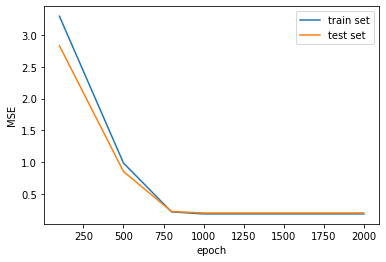

In [4]:
import matplotlib.pyplot as plt

epoch = [100,500,800,1000,1200,1500,2000]
train = []
test = []
for t in epoch:
    net = MLPRegressor(hidden_layer_sizes=(2,), max_iter=t, random_state=120)
    net.fit(X_train,y_train)
    y1 = net.predict(X_train)
    y2 = net.predict(X_test)
    train.append(mse(y_train,y1))
    test.append(mse(y_test,y2))
    
plt.plot(epoch,train,label='train set')
plt.plot(epoch,test,label='test set')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
print('epochs =', epoch, '\n')
print('train set mse =', train, '\n')
print('test set mse =', test)
plt.show();

Выводы:
* Ошибка с увеличением числа эпох на обучение заметно уменьшается и уже при 800-й эпохе происходит значительный её спад.
* With an increase in the number of epochs for training, the error noticeably decreases, and already at the 800th epoch, it significantly decreases.

---

5. Оценить рекомендуемое количество скрытых нейронов в задаче рассматриваемого класса. Создать новую сеть с таким количеством скрытых нейронов (количество скрытых слоев – 1). Обучить эту сеть на том же наборе данных, что и сеть из п. 3. Сравнить качество полученных аппроксимаций. Сделать выводы.
* Estimate the recommended number of hidden neurons in the problem of the considered class. Create a new network with this number of hidden neurons (the number of hidden layers is 1). Train this network on the same data set as the network from step 3. Compare the quality of the obtained approximations. Draw conclusions.

In [5]:
net = MLPRegressor(max_iter=50, random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print(y_pred[:5],y_test[:5], '\n')
print('mse =', mse(y_test,y_pred))

[6.03975604 5.52790779 5.30194571 5.62631767 4.7045096 ] [5.29844947 6.72457432 4.0144134  4.75209867 4.00787849] 

mse = 1.0485811133257263


In [6]:
net = MLPRegressor(hidden_layer_sizes=(1), max_iter=50, random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print(y_pred[:5],y_test[:5], '\n')
print('mse =', mse(y_test,y_pred))

[6.91781644 6.02804271 6.78895534 6.05733682 5.32760369] [5.29844947 6.72457432 4.0144134  4.75209867 4.00787849] 

mse = 3.1729113654003482


Выводы:
* Если брать рекомендуемое количество скрытых нейронов, то тут ошибка становится на порядок меньше.
* If we take the recommended number of hidden neurons, then the error becomes an order of magnitude smaller.

--- 

6. Внести изменения (шум) в исходный набор данных. Для этого прибавить к аппроксимируемым значениям функции нормально распределенную случайную величину со средним значением, равным нулю, и средним квадратичным отклонением _σ_, равным 0.2.
* Make changes (noise) to the original dataset. To do this, add to the approximated values of the function a normally distributed random variable with a mean value equal to zero and a standard deviation _σ_ equal to 0.2.

In [7]:
noise = np.random.normal(0,0.2,len(y))
y_noise = y + noise
print(y[:5],y_noise[:5])

[4.57351816 6.65059761 6.68039748 3.82603142 5.44695727] [4.76992481 6.55112015 7.03876727 3.49040015 5.60719617]


---

7. Выполнить обучение нейросети на зашумленных данных (использовать сеть с той же структурой и те же параметры обучения, что и для исходного набора данных). Сравнить полученные результаты.
* Perform neural network training on noisy data (use a network with the same structure and the same training parameters as for the original data set). Compare the results.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y_noise, test_size=0.3, random_state=120)
net = MLPRegressor(hidden_layer_sizes=(2), max_iter=50, random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print(y_pred[:5],y_test[:5], '\n')
print('mse =', mse(y_test,y_pred))

[4.91377959 3.82360378 5.55369785 4.41714187 3.08983155] [5.28223916 6.71649328 3.95521874 4.6701023  3.96658734] 

mse = 4.64092100420255


Выводы:
* Результаты получились практически одинаковыми, что с шумом и что без него.
* The results were almost the same, with and without noise.

---

8. Поэкспериментировать со степенью зашумлённости исходных данных, варьируя значения _σ_. Проанализировать зависимость качества аппроксимации от значения _σ_.
* Experiment with the degree of noisiness of the initial data by varying the values of _σ_. Then analyze the dependence of the approximation quality on the value of _σ_.

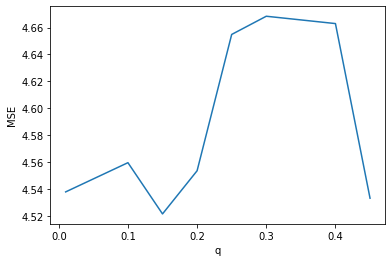

In [9]:
qq = [0.01,0.1,0.15,0.2,0.25,0.3,0.4,0.45]
mseq = []
for q in qq:
    noise = np.random.normal(0,q,len(y))
    y_noise = y + noise
    X_train, X_test, y_train, y_test = train_test_split(x, y_noise, test_size=0.3, random_state=120)
    net = MLPRegressor(hidden_layer_sizes=(2,), max_iter=50, random_state=120)
    net.fit(X_train,y_train)
    y_pred = net.predict(X_test)
    mseq.append(mse(y_test,y_pred))
    
plt.plot(qq,mseq)
plt.xlabel('q')
plt.ylabel('MSE')
plt.show();

Выводы:
* Небольшой шум < 0.2 способствует неплохой аппроксимации функции, а уже значения > 0.2 ухудшают этот процесс.
* A small noise < 0.2 contributes to a good approximation of the function, and even values > 0.2 worsen this process.

---

**Задание 12.**

Создать и обучить нейросеть, аппроксимирующую таблицу умножения.

1. Сформировать набор данных: таблица умножения для чисел от 1 до 10. Выполнить разбиение данных на обучающую/тестовую выборки (обучающая выборка – 70% от всех имеющихся данных). Сформировать обучающий и тестовый набор для нейросети.
2. Создать нейросеть с одним скрытым слоем, состоящим из двух нейронов. Обучить ее на обучающем наборе данных. Вывести аппроксимируемые значения и предсказания сети для тестовой выборки. Вывести график ошибок сети на обучающей и тестовой выборке в зависимости от количества итераций. Сделать выводы.
3. Поэкспериментировать с числом скрытых нейронов и числом скрытых слоев (число слоев не более 2). Проанализировать полученные результаты, сделать выводы.
4. Выполнить масштабирование набора данных и повторить действия п. 2. Сравнить полученные результаты с результатами выполнения п. 2.
5. Поэкспериментировать с параметрами алгоритма обучения: длиной шага и уменьшением длины шага (в классе _BackpropTrainer_ – _learningrate_ и _lrdecay_ соответственно), а также с количеством эпох. Определить набор значений параметров, обеспечивающий наилучшие результаты.

---

1. Сформировать набор данных: таблица умножения для чисел от 1 до 10. Выполнить разбиение данных на обучающую/тестовую выборки (обучающая выборка – 70% от всех имеющихся данных). Сформировать обучающий и тестовый набор для нейросети.
* Generate a data set: multiplication table for numbers from 1 to 10. Split the data into training/test samples (training sample - 70% of all available data). Form a training and test set for the neural network.

In [10]:
x = []
for i in range(1,11):
    for j in range(1,11):
        x.append(np.array([i,j]))
xs = np.array(x)
ys = np.array([a * b for a,b in x])

X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.3, random_state=120)

---

2. Создать нейросеть с одним скрытым слоем, состоящим из двух нейронов. Обучить ее на обучающем наборе данных. Вывести аппроксимируемые значения и предсказания сети для тестовой выборки. Вывести график ошибок сети на обучающей и тестовой выборке в зависимости от количества итераций. Сделать выводы.
* Create a neural network with one hidden layer consisting of two neurons. Train it on the training dataset. Output approximate values and network predictions for the test sample. Plot the network errors on the training and test sets depending on the number of iterations. Draw conclusions.

y_test = [ 9 36  6 14 40 49 10 42  4 24 12 36 72 24  6 14  8 72 28 18 48 35  5 12
 30 15 10 63 54 18] 

y_pred = [14.66521106 15.94635755  9.23835925 13.06886073 18.81830952 17.86160829
 10.51396088 16.90305878  7.32126022 15.30486016 10.19506047 15.62560885
 21.37505764 13.07070901  7.64016063 11.47435868  9.23651096 21.05615724
 14.02925852 13.39145771 17.54270788 15.94450926  9.55541137 11.7914108
 15.62745714 11.47251039 15.94266098 20.41650813 19.45795862 11.79325909] 



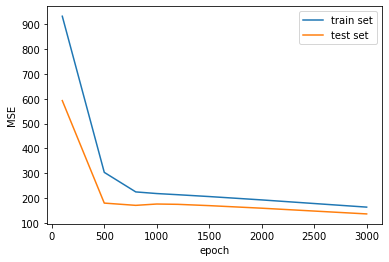

mse min = [164.02508179003746, 136.69840783392542]


In [11]:
net = MLPRegressor(hidden_layer_sizes=(2,), random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print('y_test =',y_test, '\n')
print('y_pred =',y_pred, '\n')

epoch = [100,500,800,1000,1200,1500,2000,3000]
train = []
test = []
for t in epoch:
    net = MLPRegressor(hidden_layer_sizes=(2,), max_iter=t, random_state=120)
    net.fit(X_train,y_train)
    y1 = net.predict(X_train)
    y2 = net.predict(X_test)
    train.append(mse(y_train,y1))
    test.append(mse(y_test,y2))
    
plt.plot(epoch,train,label='train set')
plt.plot(epoch,test,label='test set')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()
print('mse min =',[train[-1],test[-1]]); # mse min: среднеквадратичная ошибка на последней (макс.) эпохе

Выводы:
* График ошибки уменьшается с увеличением кол-ва итераций, но тем не менее остается на большом уровне, что не есть хорошо судя также по предсказанным значениям.
* The error graph decreases with an increase in the number of iterations, but nevertheless remains at a high level, which is not good, judging by the predicted values.

---

3. Поэкспериментировать с числом скрытых нейронов и числом скрытых слоев (число слоев не более 2). Проанализировать полученные результаты, сделать выводы.
* Experiment with the number of hidden neurons and the number of hidden layers (no more than 2 layers). Analyze the results and draw conclusions.

In [12]:
net = MLPRegressor(hidden_layer_sizes=(5,10), random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print('y_test =',y_test[:5])
print('y_pred =',y_pred[:5])
print('mse =',mse(y_test,y_pred))

net = MLPRegressor(hidden_layer_sizes=(4,16), random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print('\ny_test =',y_test[:5])
print('y_pred =',y_pred[:5])
print('mse =',mse(y_test,y_pred))

net = MLPRegressor(hidden_layer_sizes=(10), random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print('\ny_test =',y_test[:5])
print('y_pred =',y_pred[:5])
print('mse =',mse(y_test,y_pred))

net = MLPRegressor(hidden_layer_sizes=(20), random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print('\ny_test =',y_test[:5])
print('y_pred =',y_pred[:5])
print('mse =',mse(y_test,y_pred))

y_test = [ 9 36  6 14 40]
y_pred = [12.21898606 21.06572376 13.2643797  12.15529987 18.40797737]
mse = 371.02198544801854

y_test = [ 9 36  6 14 40]
y_pred = [12.00255133 27.13236451 16.90347056 12.65179901 20.50317591]
mse = 280.5885888044742

y_test = [ 9 36  6 14 40]
y_pred = [3.68216221 6.7724436  3.66681394 3.70893348 6.13507215]
mse = 818.8892608700803

y_test = [ 9 36  6 14 40]
y_pred = [ 8.41476567 10.29060135  5.70001095  7.47735502 11.2296905 ]
mse = 639.5940340045404


Выводы:
* Сеть с двумя скрытыми слоями (4 нейрона на первом и 16 на втором) показала наименьшую ошибку, но этого все равно недостаточно, чтобы даже с небольшой погрешностью дать ответ на вопрос касательно умножения двух чисел.
* A network with two hidden layers (4 neurons on the first and 16 on the second) showed the smallest error, but this is still not enough to answer the question regarding the multiplication of two numbers even with a small error.

---

4. Выполнить масштабирование набора данных и повторить действия п. 2. Сравнить полученные результаты с результатами выполнения п. 2.
* Perform scaling of the data set and repeat the steps of step 2. Compare the results obtained with the results of step 2.

y_test = [ 9 36  6 14 40 49 10 42  4 24 12 36 72 24  6 14  8 72 28 18 48 35  5 12
 30 15 10 63 54 18] 

y_pred = [2.26150059 2.76401118 1.62754847 1.97733039 3.76203908 3.43705128
 1.77583962 3.08899897 1.50020327 2.50122363 1.73876683 2.6326174
 4.69786673 1.92978463 1.53727605 1.79196645 1.67509423 4.58953746
 2.06790657 1.91931165 3.32872201 2.74094667 1.71216702 1.876585
 2.65568191 1.83951222 2.71788216 4.34981442 4.00176212 1.82903924] 



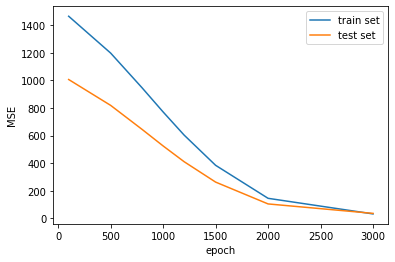

mse min = [31.44337385406621, 35.322763961802025]


In [13]:
from sklearn.preprocessing import StandardScaler

xscale = StandardScaler().fit_transform(xs) # проводим масштабирование признаков
X_train, X_test, y_train, y_test = train_test_split(xscale, ys, test_size=0.3, random_state=120)
net = MLPRegressor(hidden_layer_sizes=(2,), random_state=120)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)
print('y_test =',y_test, '\n')
print('y_pred =',y_pred, '\n')

epoch = [100,500,800,1000,1200,1500,2000,3000]
train = []
test = []
for t in epoch:
    net = MLPRegressor(hidden_layer_sizes=(2,), max_iter=t, random_state=120)
    net.fit(X_train,y_train)
    y1 = net.predict(X_train)
    y2 = net.predict(X_test)
    train.append(mse(y_train,y1))
    test.append(mse(y_test,y2))
    
plt.plot(epoch,train,label='train set')
plt.plot(epoch,test,label='test set')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()
print('mse min =',[train[-1],test[-1]]);

Выводы:
* Сходимость сети улучшилась после масштабирования признаков.
* Network convergence improved after feature scaling.

--- 

5. Поэкспериментировать с параметрами алгоритма обучения: длиной шага и уменьшением длины шага (в классе _BackpropTrainer_ – _learningrate_ и _lrdecay_ соответственно), а также с количеством эпох. Определить набор значений параметров, обеспечивающий наилучшие результаты.
* Experiment with the parameters of the learning algorithm: step length and step length reduction (in the _BackpropTrainer_ class – _learningrate_ and _lrdecay_, respectively), as well as with the number of epochs. Determine the set of parameter values that provides the best results.

**<u>внимание</u>**: "(в классе _BackpropTrainer_ – _learningrate_ и _lrdecay_ соответственно)" для этого нужно использовать библиотеку **pybrain**, но в данном случае используется **sklearn** и в ней также есть возможность для нейронной сети (в данном случае `MLPRegressor`) устанавливать начальную длину шага (`learning_rate_init`), который будет уменьшаться параметром `power_t`: `effective_learning_rate = learning_rate_init / pow(t, power_t)`, как и менять кол-во эпох `max_iter` обучения; только это будет работать в случае `sgd` решателя поэтому его стоит указать изначально в параметрах как: `model = MLPRegressor(solver='sgd', learning_rate='invscaling')`

In [14]:
from sklearn.model_selection import RandomizedSearchCV

params = {
          'learning_rate' : ['invscaling'], 'learning_rate_init':[0.001,0.0025,0.005,0.0075,0.01,0.05,0.075,0.1,0.15,0.2],
          'power_t' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7], 'max_iter' : [10,25,50,100,150,300,500,700,1000,1500,2000,2500,3000]
         }

model = MLPRegressor()
rg = RandomizedSearchCV(model, params)
rg.fit(X_train,y_train)
best = rg.best_estimator_
print('лучшие параметры:')
print(rg.best_params_, '\n')
y_pred = best.predict(X_test)
print('y_test =',y_test[:5], '\n')
print('y_pred =',y_pred[:5], '\n')
print('mse =', mse(y_test,y_pred))

лучшие параметры:
{'power_t': 0.7, 'max_iter': 100, 'learning_rate_init': 0.1, 'learning_rate': 'invscaling'} 

y_test = [ 9 36  6 14 40] 

y_pred = [11.32887893 34.5549091   6.26161069 12.74244959 40.83336257] 

mse = 1.8610904331703606


---

**Задание 13.** (дополнительно).

Рассматривается задача оценки качества вина по его физико-химическим свойствам: _P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009._
Исходные данные размещены в открытом доступе: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv (репозиторий UCI). Они содержат 1599 образцов красного вина, описанных 11 признаками, среди которых – кислотность, процентное содержание сахара, алкоголя и др. Кроме того, каждому объекту поставлена в соответствие оценка качества по шкале от 0 до 10 (выставлена экспертами). Требуется восстановить оценку качества вина по исходному признаковому описанию.

1. Проанализировать задачу и формализовать ее как задачу многоклассовой классификации.
2. Импортировать исходные данные в массив _**NumPy**_ (проще всего – использовать метод _**numpy.loadtxt**_). Вывести несколько первых записей и размерность сформированного массива (для контроля корректности импорта). <br><u>Указание</u>: Альтернативой загрузки данных из заранее сохраненного файла может служить загрузка данных напрямую из репозитория. Для этого следует использовать метод _**urlopen**_ стандартного модуля _**urllib.request**_
3. Выделить целевой признак (экспертную оценку) в отдельный массив. Вывести содержимое этого массива в виде гистограммы и убедиться, что данные являются несбалансированными: основная масса объектов имеет оценки от 5 до 7.
4. Привести рассматриваемую задачу к задаче трехклассовой классификации: объектам с оценкой менее 5 сопоставить оценку 5, объектам с оценкой более 7 – оценку 7; после этого – вычесть из всех полученных оценок минимальную. В итоге должен получиться набор данных с оценками 0, 1 и 2.
5. Выполнить стандартную нормализацию признаков объектов (написав простой код либо применив метод _**normalize**_ модуля _**sklearn.preprocessing**_).
6. Выполнить разбиение данных на обучающую/тестовую выборки (обучающая выборка – 70% от всех имеющихся данных).
7. Инициализировать структуру данных _**ClassificationDataSet**_, используемую библиотекой _**PyBrain**_ (структура принимает в качестве аргументов количество признаков в наборе данных и количество различных меток классов). Инициализацию следует выполнить отдельно для обучающего и тестового набора данных (создать два объекта). В каждом из созданных объектов выполнить бинаризацию целевой переменной с помощью функции _**_convertToOneOfMany()**_.
8. Создать нейросеть с одним скрытым слоем, состоящим из 100 нейронов; функция активации выходного слоя – _softmax_. Обучить сеть на обучающем наборе данных, задав максимальное количество эпох равным 100. Вывести график ошибок сети на обучающей и тестовой выборке в зависимости от количества итераций. Вывести доли неправильных ответов на обучающей и тестовой выборке.
9. Проанализировать полученные результаты. Сформулировать свои предложения по улучшению качества модели. Выполнить их реализацию.